# Read image

In [25]:
from skimage import io

In [26]:
#image_path = ''
image_path = '../../GoogleEarthEngine/patches_6bands/2015/5/Image 2015_5_sharpend_27.tif'

In [27]:
im = io.imread(image_path)

# image has 6 bands, 2 to 6
im.shape

(256, 256, 6)

# See the image

<p align="center">
  <img src="https://www.researchgate.net/profile/Bakenaz-Zeidan/publication/327212711/figure/tbl3/AS:668486690934791@1536391055484/Landsat-8-Bands-Designations.png" width="500" height="400">
</p>


# RGB image

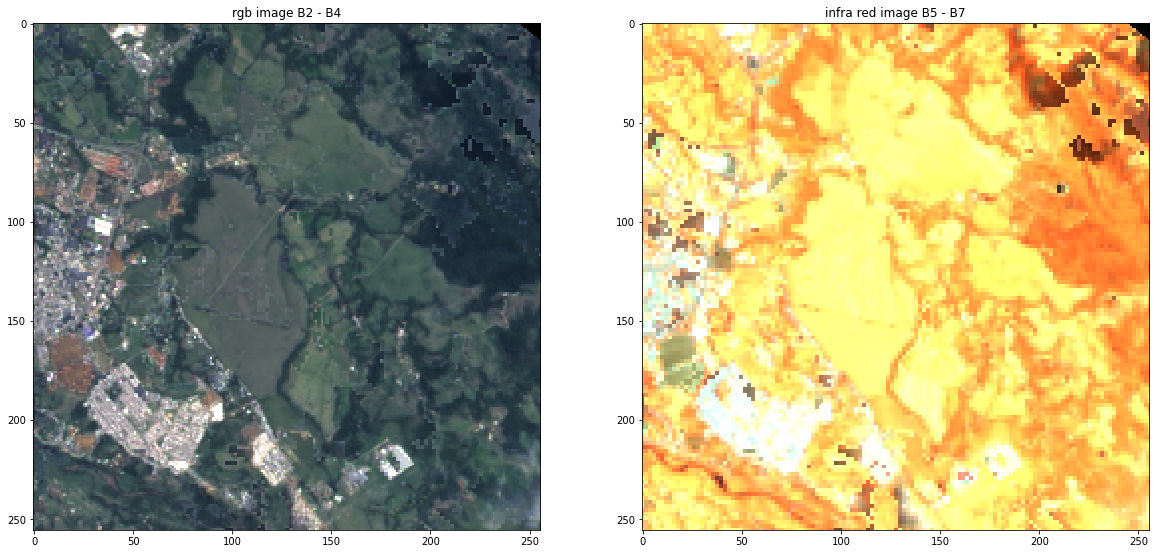

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,15))

axs[0].set_title('rgb image B2 - B4')
axs[0].imshow(im[:,:,:3], interpolation='nearest')

axs[1].set_title('infra red image B5 - B7')
axs[1].imshow(im[:,:,3:6], interpolation='nearest')

plt.show()

# Data Preparation

In [29]:
flatten_image = im.reshape((im.shape[0] * im.shape[1], im.shape[2]))
flatten_image.shape

(65536, 6)

# Train Model

In [30]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5).fit(flatten_image)

# Generate Cluster

In [31]:
import numpy as np
segmented_image = np.array(model.labels_)
segmented_image.shape

(65536,)

In [32]:
segmented_image = segmented_image.reshape((im.shape[0] , im.shape[1]))
segmented_image.shape

(256, 256)

# See Cluster

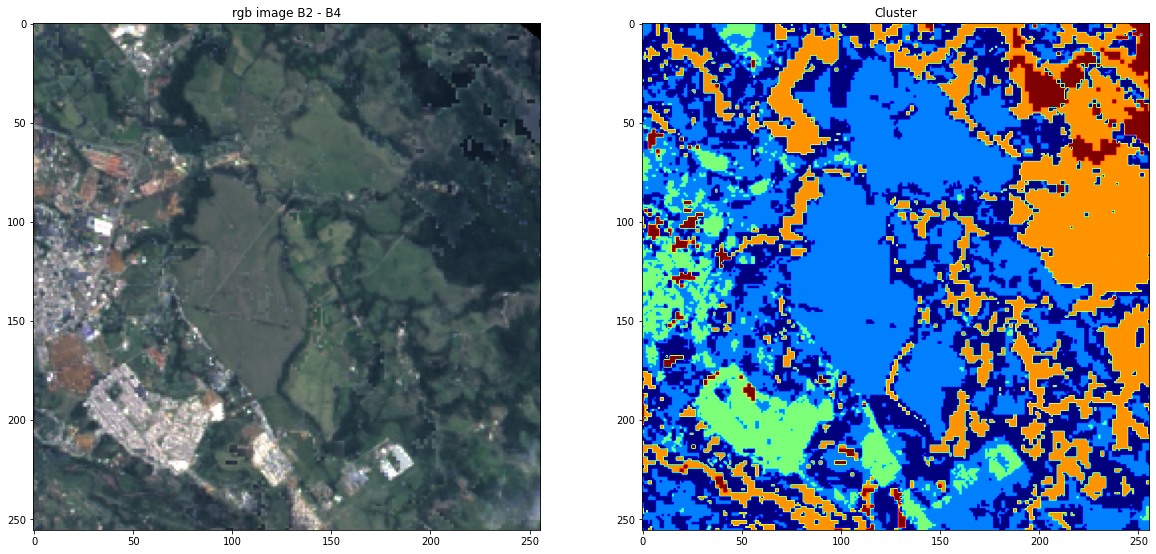

In [33]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,15))

axs[0].set_title('rgb image B2 - B4')
axs[0].imshow(im[:,:,:3])

axs[1].set_title('Cluster')
axs[1].imshow(segmented_image, cmap='jet')

plt.show()